In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
import seaborn as sns
import matplotlib. pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")

In [4]:
data.shape

(1599, 13)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [6]:

data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [7]:
#As we have categorical column(Alcohol_content) we need to convert it into numeric data)
#content is following some order like low, We need to give weight according to that order

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
ord_encoder = OrdinalEncoder(categories=[['Low','Medium','High']])


In [15]:
df1 = ord_encoder.fit_transform(data[['Alcohol_content']] )
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [16]:
##override alcohol content column with codes

data['Alcohol_content']=df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# plotting heatmap(Correlation matrix)

In [17]:
#lets use heatmap to visualize and find coeff of multicollinearity

In [29]:
# we will get relationship of one variable with rest of the variables
df_corr = data.corr().abs()
     

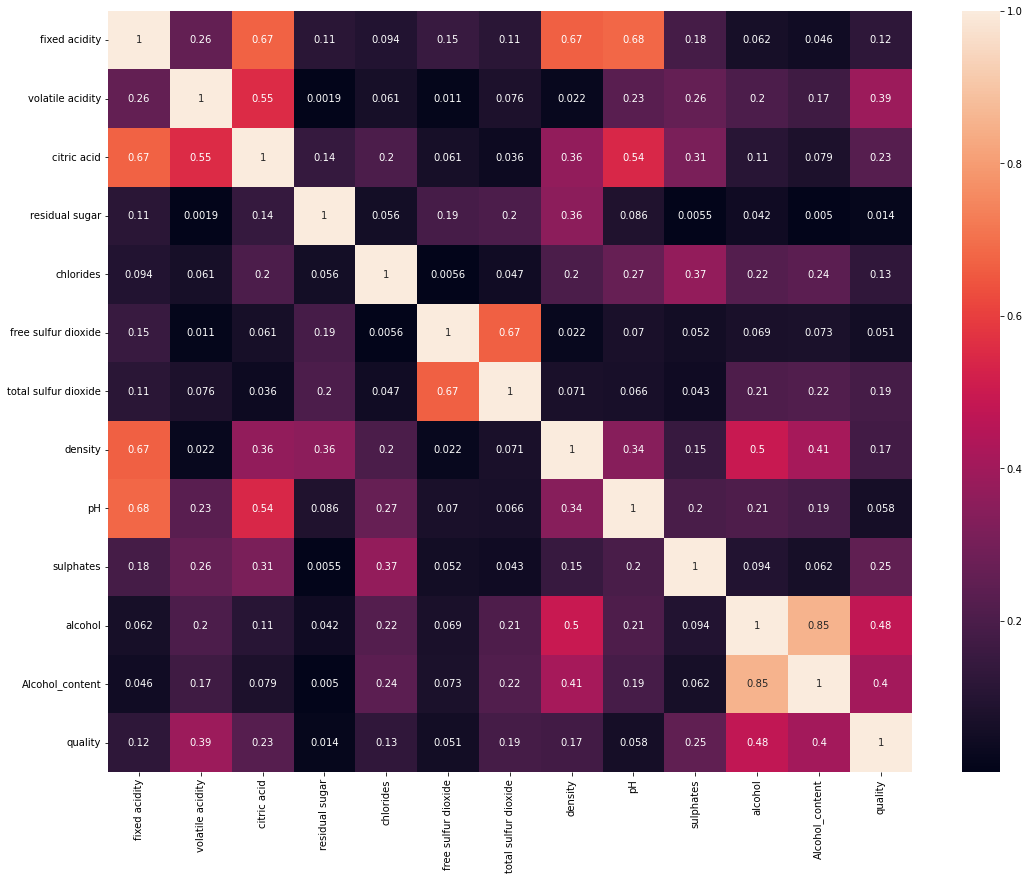

In [30]:
plt.figure(figsize=(18,14))      #length and width

sns.heatmap(df_corr,annot=True,annot_kws={'size':10})		#annot if the nos describing inside the map

plt.show()

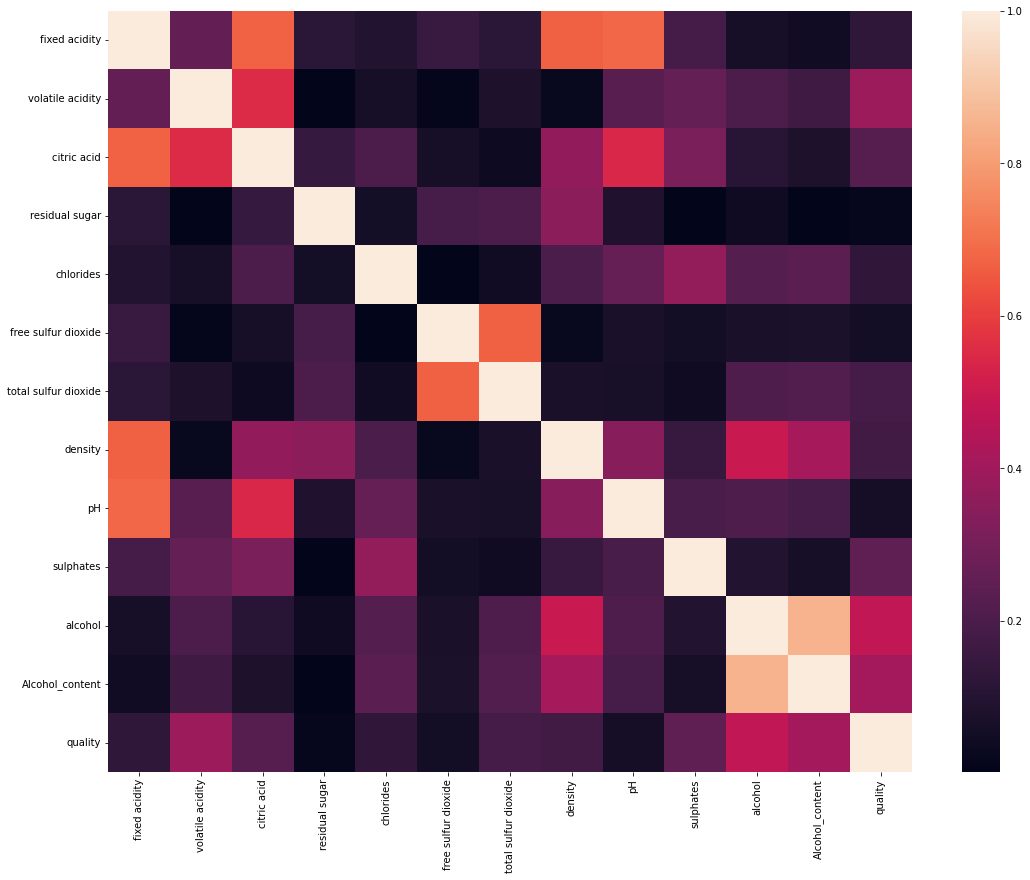

In [33]:
plt.figure(figsize=(18,14))      #length and width

sns.heatmap(df_corr,annot=False)		#annot if the nos describing inside the map

plt.show()

# make sure they are really correlated(it would follow some trend

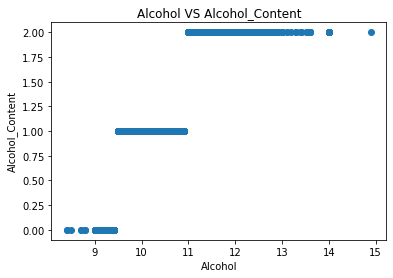

In [37]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_Content')
plt.title('Alcohol VS Alcohol_Content')

plt.show()

In [39]:
#So we will delete one of the column
#so we will check which one has less relation ship with label and delete that feature


In [44]:
X= data.drop(['Alcohol_content','quality'],axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [43]:
y=data['quality']

In [45]:
data.shape

(1599, 13)

In [190]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=41 )

In [106]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)	
        print('accuracy score: {accuracy_score(y_train,y_pred) *100:.2}%')
        print('accuracy score:',round(accuracy_score(y_train,y_pred)*100,2))
    elif train==False :
        pred = clf.predict(x_test)
        print("accuracy score: {accuracy_score(y_test,pred) *100:.2}%")
        print('accuracy score:',round(accuracy_score(y_test,pred) *100,2))
        print('\n\n Classification Report \n' ,classification_report(y_test,pred,digits=2))
        


In [82]:
#no need to standardise the data as we are ging to use decision tree

#model initiation

In [83]:
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [107]:
#calling the fn
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)



accuracy score: {accuracy_score(y_train,y_pred) *100:.2}%
accuracy score: 87.82
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 56.25


 Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.14      0.27      0.19        11
           5       0.63      0.71      0.67       157
           6       0.61      0.50      0.55       168
           7       0.47      0.44      0.45        57
           8       0.25      0.25      0.25         4

    accuracy                           0.56       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.57      0.56      0.56       400



In [86]:
#there is  a  possibility of overfitting for decision tree
#because it is Rule based algorithm

In [88]:
    
#lets visualize how the tree looks like for demo purpose


feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [92]:
#(import graphviz
#from sklearn.tree import export_graphviz
#from sklearn import tree
#from IPython.display import Image
#import pydotplus )

In [93]:
#create a dotfiel which stores the tree structure

#dot_data  = export_graphviz(clf,feature_name , rounded=True ,Tilted= True )

#draw graph 

#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png("mytree.png)

#show Graph
#Image(graph.create_png())


In [191]:
#We will tune 4  imp hyperparameters right now


grid_param =  {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(10,15),             #the max depty of the tree(try 6 to 20)
    'min_samples_leaf' : range(2,6),        #the min no of samaples req to be at a leaf node	(4 to 20 or 30)
    'min_samples_split' : range(3,8),		#the min no of samples req  to split at an internal node(2 t 10
    'max_leaf_nodes': range(5,10)			#Best nodes are def as relative reduction in impurity .If none then unlimited nos(3 to 15) 
    }
grid_param

{'criterion': ['gini', 'entropy'],
 'max_depth': range(10, 15),
 'min_samples_leaf': range(2, 6),
 'min_samples_split': range(3, 8),
 'max_leaf_nodes': range(5, 10)}

In [188]:
grid_search = GridSearchCV(estimator=clf,
                            param_grid = grid_param , cv=5,n_jobs=-1)
#use all the cores in your system for performance imp
grid_search

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [192]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [193]:
best_parameters = grid_search.best_params_
print( best_parameters)


{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 7, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [180]:
#initiate DecicisionTreeClassifier with new parameters and train them]

clf = DecisionTreeClassifier(criterion='entropy',min_samples_split = 3 ,max_depth =10 ,min_samples_leaf = 2 )
#clf = DecicisionTreeClassifier(criterion='gini',min_samaples_split = 3 ,max_depth =10 ,min_samples_leaf = 2 )



In [194]:
#train the model

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3)

In [108]:
#calling the fn now with updated model
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2}%
accuracy score: 87.82
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 56.25


 Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.14      0.27      0.19        11
           5       0.63      0.71      0.67       157
           6       0.61      0.50      0.55       168
           7       0.47      0.44      0.45        57
           8       0.25      0.25      0.25         4

    accuracy                           0.56       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.57      0.56      0.56       400



# Ensemble    (16sep)

##BaggingClassifier


In [182]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier



In [183]:

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()


In [184]:
X = dataset.data      #feature


In [185]:
y = dataset.target		#label

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)


In [137]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train )
knn.score(X_test,y_test)

0.8951048951048951

In [140]:
#lets use bagging over KNN classifier and see if our scores improves-

#bootstrap -True is with replacement method
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
            n_estimators=9, max_samples=0.7, 
            bootstrap= True ,random_state=3, oob_score =True )

#oob_score -out of bag score

In [143]:
#Training
bag_knn.fit(X_train,y_train)
bag_knn.score(X_test,y_test)

0.9020979020979021

In [144]:
#our score signifivantly improves with use of bragging
#lets not use bootstrap and see the result

In [147]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
            n_estimators=9, max_samples=0.7, 
            bootstrap= False ,random_state=3, oob_score =False )

#bootstrap= False is pasting method


In [148]:
pasting_knn.fit(X_train,y_train)
pasting_knn.score(X_test,y_test)

0.8881118881118881

# Random Forest  (1hr 47  min 17 sep)


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [196]:
#preprocessing,Normalizing
from sklearn.preprocessing import StandardScaler


In [272]:

#models
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [203]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv')
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0


In [204]:

df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [205]:
#Metrics
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report


In [206]:
#dataset stats
#Zero means No and 1 means yes
print(df.shape)


(69301, 13)


In [207]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
#observations
#assuming age in days
#Outliers in height 
#outliers in Systolic blood press -Ap high(ap hi)
#outliers in ap_low(Ap lo)
#seems cholestrol and glucose are bin=ary .will see in the further analysis


In [209]:
#drop id
df.drop('id', axis=1,inplace=True)


In [211]:
df.drop_duplicates(inplace=True)

df.shape

(69277, 12)

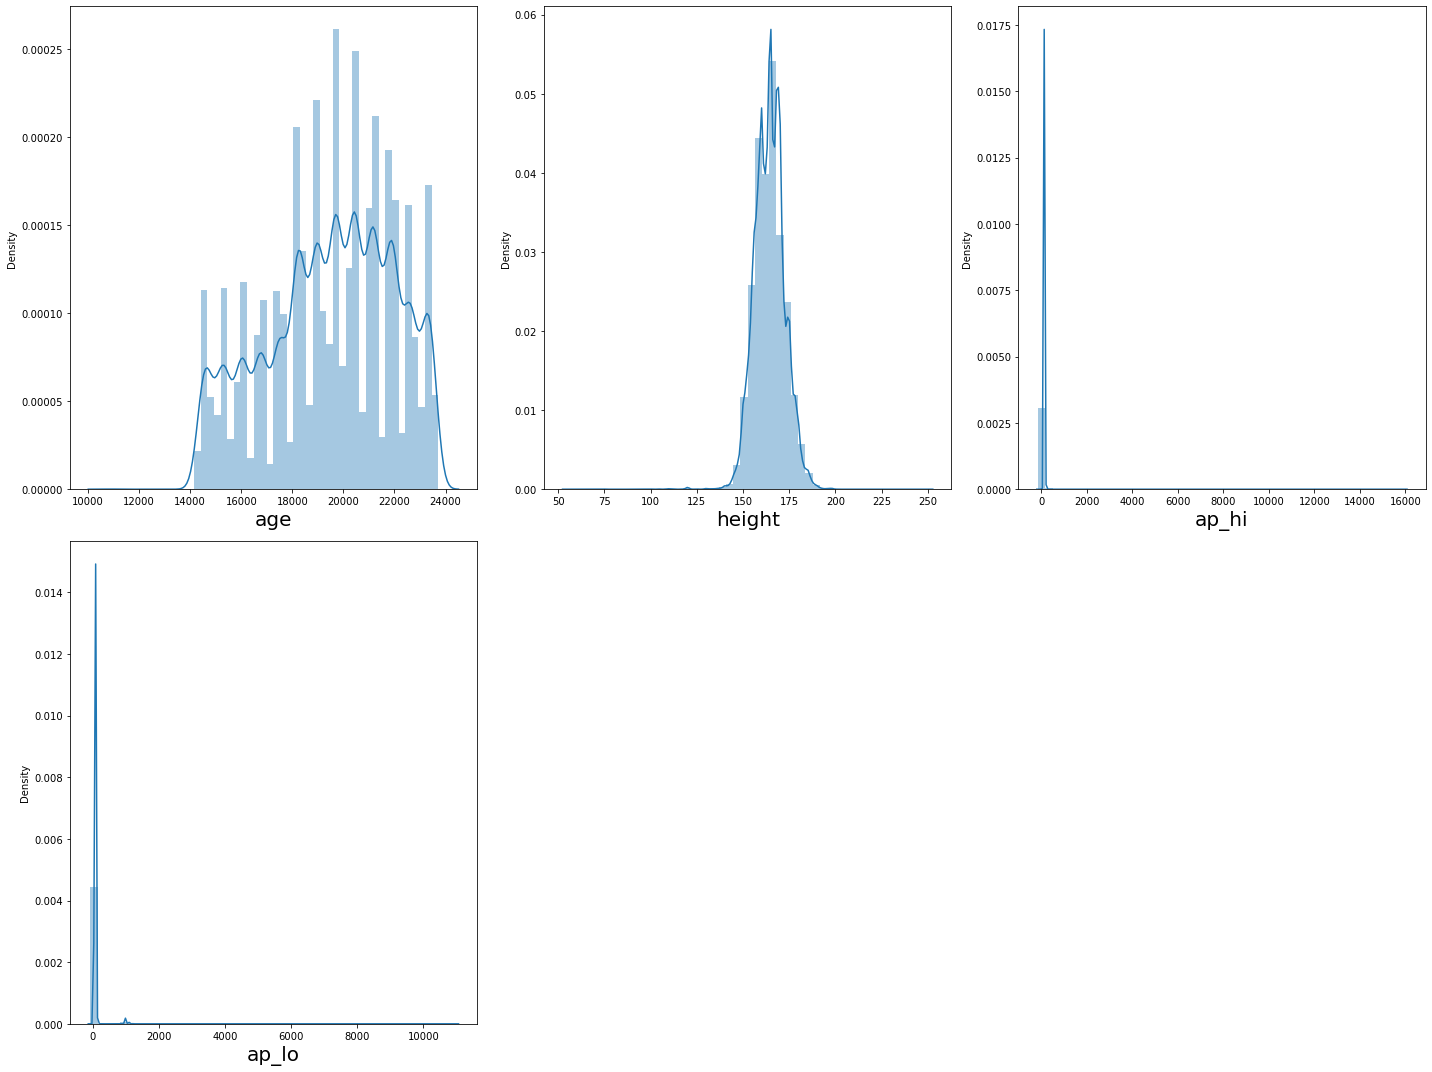

In [215]:
plt.figure(figsize=(20,15))
plotno = 1
for column in df[['age','height','ap_hi','ap_lo']]:
	if plotno<=6:
		ax = plt.subplot(2,3,plotno)
		sns.distplot(df[column])
		plt.xlabel(column,fontsize=20)

	plotno+=1

plt.tight_layout()

In [216]:
#1hr17 min

In [217]:

#with std 3 lets see the stats

#z=(x-mean)/std


In [218]:
from scipy.stats import zscore

zsco = zscore(df[['age','height','ap_hi','weight','ap_lo']])

abs_z_score =np.abs(zsco)

In [231]:
filtering_entry =(abs_z_score<3).all(axis=1)

In [232]:
df = df[filtering_entry]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000
mean,19550.328724,1.339240,164.187468,72.612051,126.006255,81.196681,1.356895,1.221282,0.084738,0.051228,0.804846,0.492266
std,2394.212085,0.473455,7.010933,11.566765,17.638352,9.745805,0.673290,0.568062,0.278493,0.220465,0.396322,0.499944
min,14535.000000,1.000000,148.000000,46.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18026.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19728.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21347.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,180.000000,102.000000,401.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


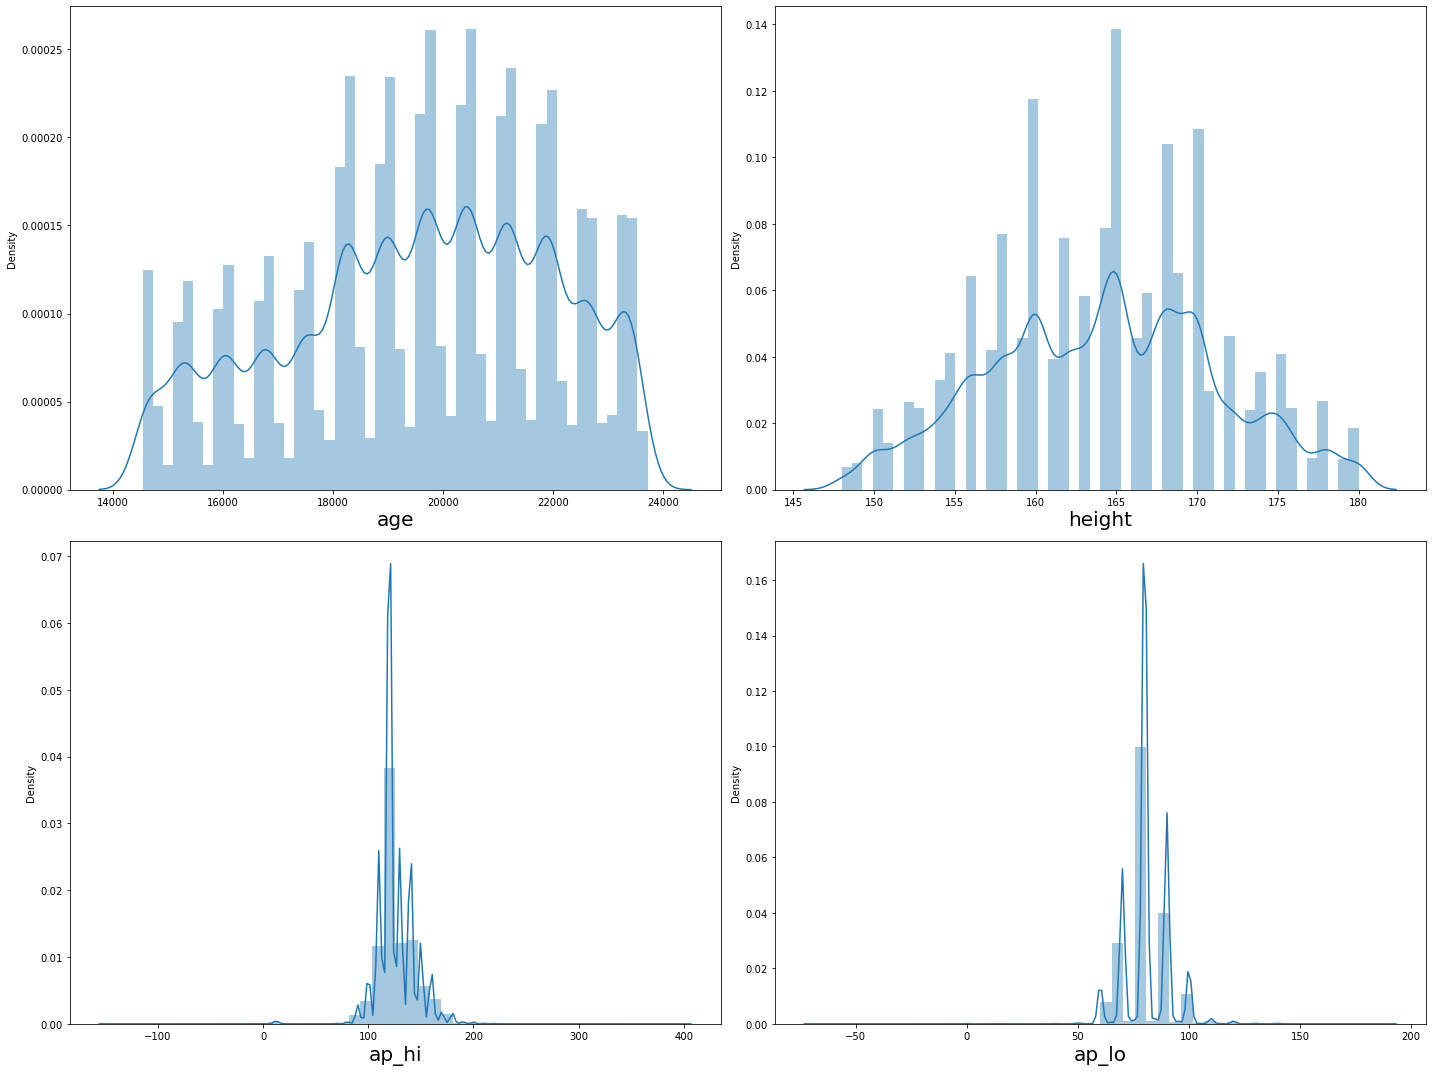

In [233]:

plt.figure(figsize=(20,15))
plotno = 1
for column in df[['age','height','ap_hi','ap_lo']]:
	if plotno<=6:
		ax = plt.subplot(2,2,plotno)
		sns.distplot(df[column])
		plt.xlabel(column,fontsize=20)

	plotno+=1

plt.tight_layout()


In [235]:
df.shape

(62192, 12)

In [239]:
#{You can use correlation matrix and heatmap to check for multicollinearity
#or correlation b/w all variable(ref decision tree algo for heatmap)

#OR

#you can use VIF to check if there is any multicollinearity (ref Loogistic regression for VIF)}*/


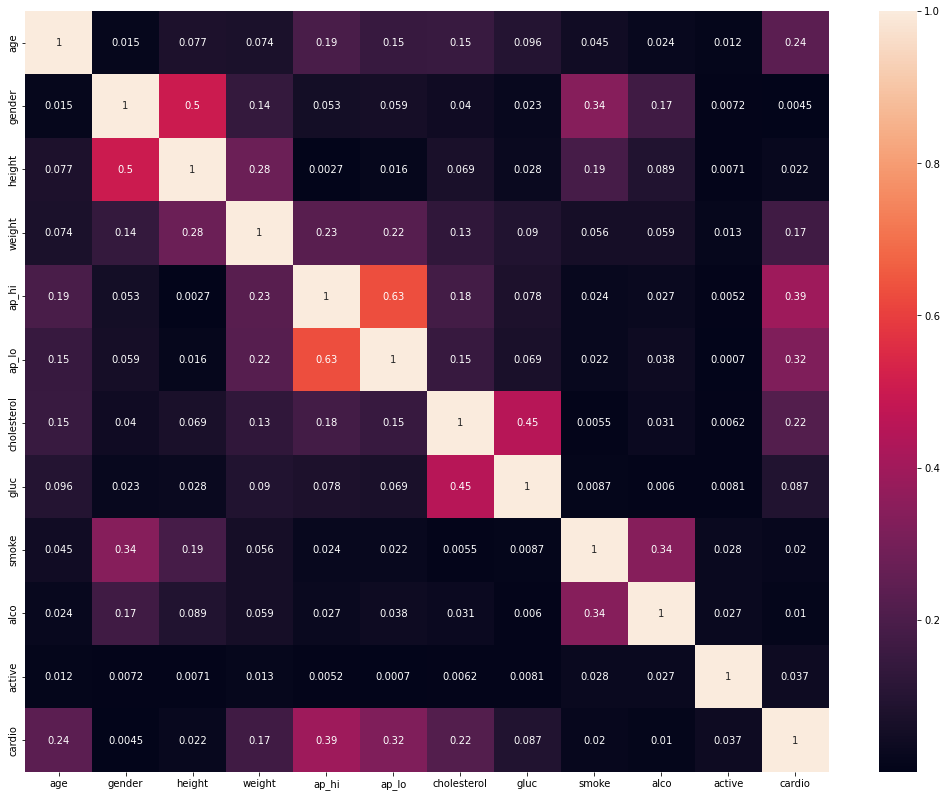

In [241]:
df_corr1 = df.corr().abs() # we will get relationship of one variable with rest of the variables
plt.figure(figsize=(18,14))		#length and width
sns.heatmap(df_corr1 ,annot=True , annot_kws={'size':10})		#annot if the nos describing inside the map

plt.show()


In [242]:
X= df.drop(columns=['cardio'],axis=1)
y = df['cardio']

In [244]:
#split into train test data set #1hr 41

In [256]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=41)


In [257]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)	
        print('accuracy score: {accuracy_score(y_train,y_pred) *100:.2}%')
        print('accuracy score:',round(accuracy_score(y_train,y_pred)*100,2))
    elif train==False :
        pred = clf.predict(x_test)
        print("accuracy score: {accuracy_score(y_test,pred) *100:.2}%")
        print('accuracy score:',round(accuracy_score(y_test,pred) *100,2))
        print('\n\n Classification Report \n' ,classification_report(y_test,pred,digits=2))
        

In [258]:
random_clf = RandomForestClassifier()
random_clf .fit(x_train,y_train)

RandomForestClassifier()

In [259]:
#calling the fn now with updated model
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2}%
accuracy score: 99.98
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 71.22


 Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      9401
           1       0.72      0.69      0.70      9257

    accuracy                           0.71     18658
   macro avg       0.71      0.71      0.71     18658
weighted avg       0.71      0.71      0.71     18658



In [260]:
#Lets tune the parameters using GridsearchCV

In [262]:
params = {
	'n_estimators':[13,15],		#range(10to20)
	'criterion':['entrioy','gini'],
	'max_depth':[10,15],
	'min_samples_split':[10,11],
	'min_samples_leaf':[5,6]
	}


In [263]:
grid = GridSearchCV(random_clf,param_grid = params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entrioy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [264]:
print('best_parameters=',grid.best_params_)

best_parameters= {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [275]:

#lets reintiate with new parameters

random_clf = grid.best_estimator_    #it will assign the best parameters directly with this
random_clf

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=13)

In [277]:
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=13)

In [278]:
#calling the fn now with updated model
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2}%
accuracy score: 74.78
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 73.13


 Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      9401
           1       0.76      0.67      0.71      9257

    accuracy                           0.73     18658
   macro avg       0.73      0.73      0.73     18658
weighted avg       0.73      0.73      0.73     18658



In [279]:
#1hr 53 min

# #plot Roc/AUC for mult models

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve ,roc_auc_score
from sklearn.metrics import plot_roc_curve 


In [281]:


lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
X = df.drop(columns=['cardio'],axis=1)
y = df['cardio']


In [282]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =41)



In [283]:
#training all models

lr.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
kn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)

print("all models are trained")


all models are trained


In [284]:
#capture scores of all models

lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
print("all models scores captured")


all models scores captured


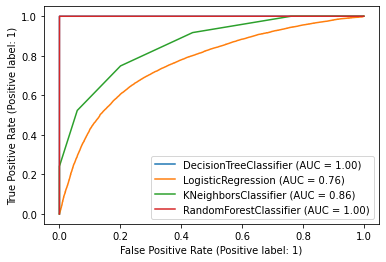

In [285]:

##Lets check ROc auc curve for the model

#how well our model works with training data
disp = plot_roc_curve(dt,X_train,Y_train)

plot_roc_curve(lr,X_train,Y_train,ax=disp.ax_)     #ax_ = Axes with confusion matrix
plot_roc_curve(kn,X_train,Y_train,ax=disp.ax_) 
plot_roc_curve(rf,X_train,Y_train,ax=disp.ax_) 
plt.legend(prop={'size':10},loc='lower right')
plt.show()



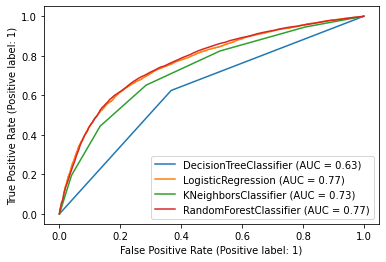

In [286]:
##How well our model works on test data

disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()
